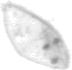

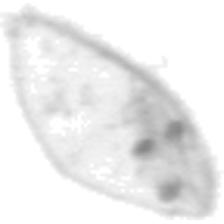

(224, 224, 3)


In [37]:
import io
import cv2
import numpy as np
from IPython.display import clear_output, Image, display
import PIL.Image


def showarray(a, fmt='jpeg'):
    """
    Display images from opencv in Jupyter notebook
    
    Input: a, opencv image to be displayed
           fmt, 
    """
    a = np.uint8(np.clip(a, 0, 255))
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))
    

def square_resize(img, target_size=224, color = [255, 255, 255]):
    """
    Code courtsey of jdhao, LastMod 2019-01-08, License CC BY-NC-ND 4.0
    https://jdhao.github.io/2017/11/06/resize-image-to-square-with-padding/
    
    Resizes input image to a padded square of given size. Biggest dimension is resized
    to specified size, smallest dimension is resized proportionally and then padded to
    achieve correct size.
    
    Input: img, image to resize
           target_size, int specifying one dimension of square, default 224 (resnet)
           color = list of r,g,b values, default white (plankton data set)
    """
    original_shape = np.shape(img)[:2]    
    ratio = target_size/max(original_shape)
    
    # calculate both dimensions using the ratio between target and actual shape
    
    new_size = tuple([int(x*ratio) for x in original_shape])
    
    # choose interpolation method
    if (new_size[0]>original_shape[0]):
        # if image is growing, use cubic interpolation
        ipol = cv2.INTER_CUBIC
    else:
        # if we are shrinking the image, use this instead
        ipol = cv2.INTER_AREA
    
    # resize, maintaining aspect
    img = cv2.resize(img, (new_size[1], new_size[0]),  interpolation=ipol)
    
    # calculate where we're missing some padding
    delta_w = target_size - new_size[1]
    delta_h = target_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)
    
    # add padding to image to get to final shape
    new_img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    
    return new_img
    

img = cv2.imread('../../data/ZooScanSet/imgs/cypris/44680883.jpg')
showarray(img)
new_img = square_resize(img)
showarray(new_img)
print(np.shape(new_img))




